In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import pymc.sampling_jax
import scipy.stats as stats
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

/Users/corrado/opt/anaconda3/envs/pymc9_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# Dati
y = 14
ntrials = 100

In [4]:
# Distribuzione a priori
alpha_prior = 4
beta_prior = 6

In [5]:
model = pm.Model()

with model:
    # Prior
    theta = pm.Beta("theta", alpha=alpha_prior, beta=beta_prior)
    # Likelihood
    obs = pm.Binomial("obs", p=theta, n=ntrials, observed=y)

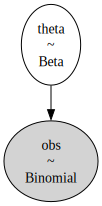

In [6]:
pm.model_to_graphviz(model)

In [7]:
with model:
    idata1 = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


In [8]:
with model:
    idata2 = pm.sampling_jax.sample_numpyro_nuts()

Compiling...


I0000 00:00:1699425527.018253       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
Compilation time = 0:00:00.386238


Sampling...


  0%|                                                                                                | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                               | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                               | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                               | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                               | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1678.73it/s]


Running chain 1: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1679.51it/s]


Running chain 2: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1680.92it/s]


Running chain 3: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1682.45it/s]


Sampling time = 0:00:01.631989


Transforming variables...


Transformation time = 0:00:00.048738


array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

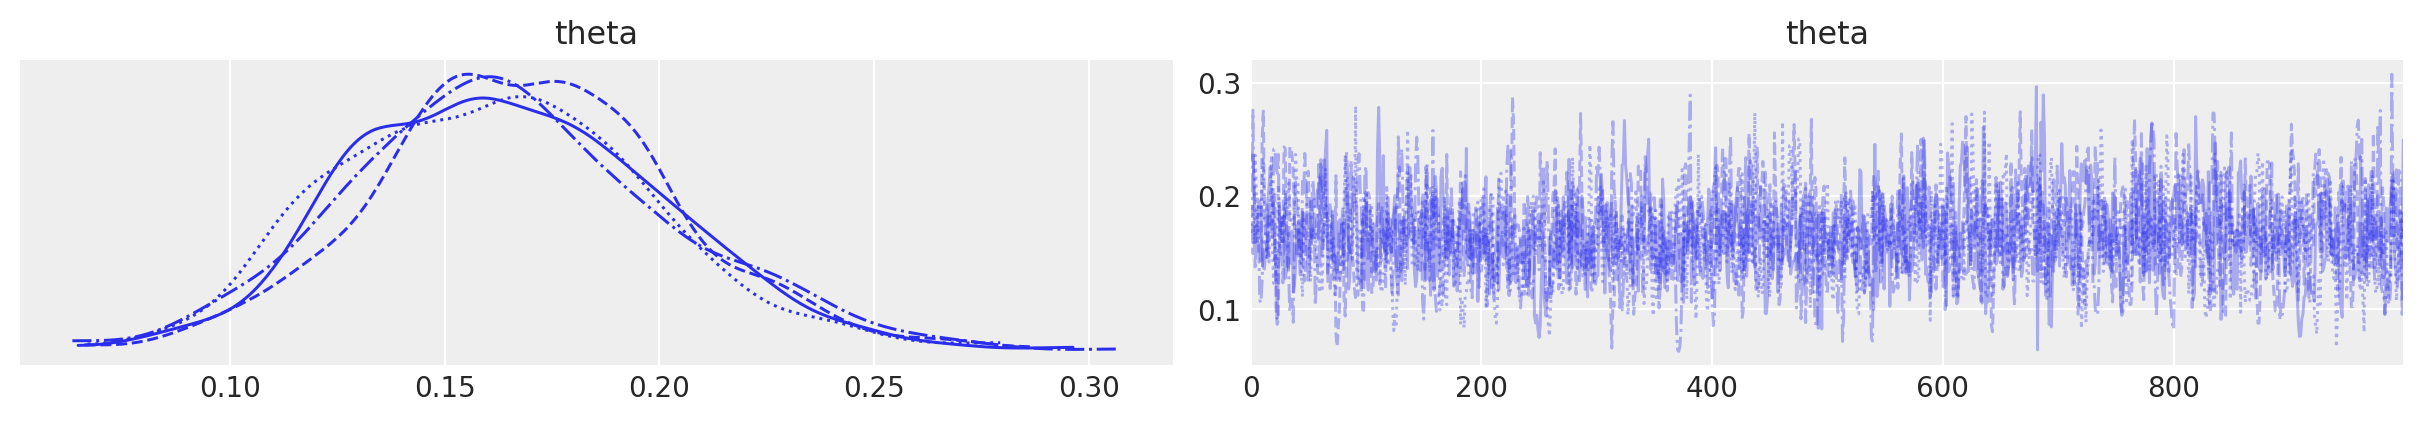

In [9]:
az.plot_trace(idata2)

In [10]:
az.summary(idata2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.165,0.036,0.099,0.235,0.001,0.001,1424.0,1822.0,1.0


In [11]:
%load_ext watermark
%watermark -n -u -v -iv -w -p numpyro,blackjax

Last updated: Wed Nov 08 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

numpyro : 0.13.2
blackjax: 0.0.0

arviz     : 0.16.1
scipy     : 1.11.3
numpy     : 1.25.2
matplotlib: 3.8.0
pymc      : 5.9.1

Watermark: 2.4.3

